# Autoencoder model

Make sure to change the paths in the first cell before running it or to put the day_data.csv and night_data.csv into the google colab files

In [1]:
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from glob import glob
import matplotlib.pyplot as plt

#Change these paths if needed.
day_data = pd.read_csv('/content/day_data.csv')
night_data = pd.read_csv('/content/night_data.csv')

All of this is just setting up the datasets

In [2]:
day_pic_information = day_data[['name', 'data']]
night_pic_information = night_data[['name', 'data']]
day_pic_information.head(5)

for index, row in day_pic_information.iterrows():
    im = imread('/content/drive/MyDrive/imageAlignedLD/' + row['name'])
    day_pic_information.at[index, 'data'] = im

for index, row in night_pic_information.iterrows():
    im = imread('/content/drive/MyDrive/imageAlignedLD/' + row['name'])
    night_pic_information.at[index, 'data'] = im

In [3]:
import tensorflow as tf

print(day_pic_information.shape)
print(night_pic_information.shape)
print(day_pic_information['data'][11].shape)
print(night_pic_information['data'][11].shape)

(101, 2)
(101, 2)
(480, 640, 3)
(480, 640, 3)


In [4]:
from PIL import Image

day_tensor = np.zeros([101, 64, 64, 3])

for index, row in day_pic_information.iterrows():
  tensor_at_index = Image.fromarray(day_pic_information['data'][index])
  tensor_at_index = np.array(tensor_at_index.resize((64, 64), Image.ANTIALIAS))
  day_tensor[index] = tensor_at_index

In [5]:
night_tensor = np.zeros([101, 64, 64, 3])

for index, row in night_pic_information.iterrows():
  tensor_at_index =Image.fromarray(night_pic_information['data'][index])
  tensor_at_index = np.array(tensor_at_index.resize((64, 64), Image.ANTIALIAS))
  night_tensor[index] = tensor_at_index

In [6]:
random_shuffle = np.random.RandomState(seed=105).permutation(101)

train_data = np.zeros([162, 64, 64, 3])

train_data[:81, :, :, :] = day_tensor[random_shuffle[0:81], :, :, :]
train_data[81:, :, :, :] = night_tensor[random_shuffle[0:81], :, :, :]

In [7]:
test_data = np.zeros([40, 64, 64, 3])

test_data[:20, :, :, :] = day_tensor[random_shuffle[81:], :, :, :]
test_data[20:, :, :, :] = night_tensor[random_shuffle[81:], :, :, :]

In [8]:
tensor_train_data = tf.constant(train_data)
tensor_test_data = tf.constant(test_data)

In [9]:
tensor_train_data = (tensor_train_data / 127.5) - 1
tensor_test_data = (tensor_test_data / 127.5) - 1

Building the model

In [10]:
from tensorflow.keras.models import Model
#initializer = tf.random_normal_initializer(0., 0.02)

class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    initializer = tf.random_normal_initializer(0., 0.02)
    self.encoder = model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=[64, 64, 3]),
      tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=initializer, use_bias=False),
      tf.keras.layers.MaxPooling2D((2, 2), padding="same"),
      tf.keras.layers.LeakyReLU(),
      tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=initializer, use_bias=False),
      tf.keras.layers.MaxPooling2D((2, 2), padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(),
      tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=initializer, use_bias=False),
      tf.keras.layers.MaxPooling2D((2, 2), padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU()
    ])
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', kernel_initializer=initializer, use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.ReLU(),
      tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', kernel_initializer=initializer, use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.ReLU(),
      tf.keras.layers.Conv2DTranspose(3, (3, 3), strides=2, padding='same', kernel_initializer=initializer, activation='tanh')
    ])
  
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Input(shape=[64, 64, 3]))
#model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=initializer, use_bias=False))
#model.add(tf.keras.layers.MaxPooling2D((2, 2), padding="same"))
#model.add(tf.keras.layers.LeakyReLU())

#model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=initializer, use_bias=False))
#model.add(tf.keras.layers.MaxPooling2D((2, 2), padding="same"))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.LeakyReLU())

#model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=initializer, use_bias=False))
#model.add(tf.keras.layers.MaxPooling2D((2, 2), padding="same"))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.LeakyReLU())

#model.add(tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', kernel_initializer=initializer, use_bias=False))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.ReLU())

#model.add(tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', kernel_initializer=initializer, use_bias=False))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.ReLU())

#model.add(tf.keras.layers.Conv2DTranspose(3, (3, 3), strides=2, padding='same', kernel_initializer=initializer, activation='tanh'))

In [11]:
model = Autoencoder()
model.build([None, 64, 64, 3])

In [12]:
model.compile(optimizer="adam", loss="MeanAbsoluteError")

Training the model.  500 epochs might be a bit overkill with the size of this dataset.

In [13]:
model.fit(
    x=tensor_train_data,
    y=tensor_train_data,
    epochs=500,
    batch_size=128,
    shuffle=True,
)

Epoch 1/500
2/2 [==============================] - 2s 280ms/step - loss: 0.5044
Epoch 2/500
2/2 [==============================] - 1s 262ms/step - loss: 0.4763
Epoch 3/500
2/2 [==============================] - 1s 260ms/step - loss: 0.4498
Epoch 4/500
2/2 [==============================] - 1s 265ms/step - loss: 0.4170
Epoch 5/500
2/2 [==============================] - 1s 261ms/step - loss: 0.3814
Epoch 6/500
2/2 [==============================] - 1s 261ms/step - loss: 0.3475
Epoch 7/500
2/2 [==============================] - 1s 277ms/step - loss: 0.3203
Epoch 8/500
2/2 [==============================] - 1s 275ms/step - loss: 0.2934
Epoch 9/500
2/2 [==============================] - 1s 272ms/step - loss: 0.2717
Epoch 10/500
2/2 [==============================] - 1s 258ms/step - loss: 0.2536
Epoch 11/500
2/2 [==============================] - 1s 265ms/step - loss: 0.2395
Epoch 12/500
2/2 [==============================] - 1s 257ms/step - loss: 0.2284
Epoch 13/500
2/2 [===================

In [14]:
encoded_predictions = model.encoder(tensor_test_data).numpy()
decoded_predictions = model.decoder(encoded_predictions).numpy()

Just some preliminary images to see how well the autoencoder preserves the data.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


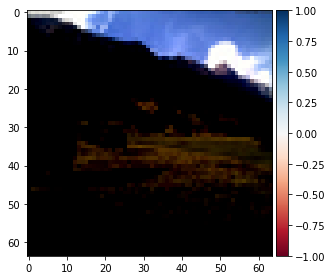

In [15]:
imshow(tensor_test_data[6, :, :, :].numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


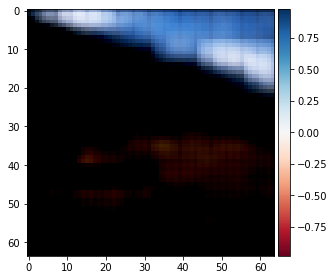

In [16]:
imshow(decoded_predictions[6,:, :, :])

Building and training Day2Night and Night2Day feedforward neural networks

In [17]:
train_autoencoders = model.encoder(tensor_train_data)
test_autoencoders = model.encoder(tensor_test_data)

In [18]:
day_to_night_model = tf.keras.Sequential()
#day_to_night_model.add(tf.keras.layers.Input(shape=[8, 8, 32])
day_to_night_model.add(tf.keras.layers.Dense(units=48, input_shape=[8, 8, 32]))
day_to_night_model.add(tf.keras.layers.Dense(32))

night_to_day_model = tf.keras.Sequential()
#night_to_day_model.add(tf.keras.layers.Input(shape=[8, 8, 32])
night_to_day_model.add(tf.keras.layers.Dense(units=48, input_shape=[8, 8, 32]))
night_to_day_model.add(tf.keras.layers.Dense(32))

In [19]:
day_to_night_model.compile(optimizer="adam", loss="MeanSquaredError")
night_to_day_model.compile(optimizer="adam", loss="MeanSquaredError")

In [20]:
day_to_night_model.fit(
    x=train_autoencoders[:81, :, :, :],
    y=train_autoencoders[81:, :, :, :],
    epochs=500,
    batch_size=128,
    shuffle=True,
)

Epoch 1/500
1/1 [==============================] - 0s 494ms/step - loss: 1.0736
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 1.0402
Epoch 3/500
1/1 [==============================] - 0s 16ms/step - loss: 1.0087
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 0.9790
Epoch 5/500
1/1 [==============================] - 0s 14ms/step - loss: 0.9509
Epoch 6/500
1/1 [==============================] - 0s 17ms/step - loss: 0.9246
Epoch 7/500
1/1 [==============================] - 0s 18ms/step - loss: 0.8997
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 0.8764
Epoch 9/500
1/1 [==============================] - 0s 17ms/step - loss: 0.8544
Epoch 10/500
1/1 [==============================] - 0s 23ms/step - loss: 0.8337
Epoch 11/500
1/1 [==============================] - 0s 23ms/step - loss: 0.8143
Epoch 12/500
1/1 [==============================] - 0s 16ms/step - loss: 0.7960
Epoch 13/500
1/1 [==============================

In [21]:
night_to_day_model.fit(
    x=train_autoencoders[81:, :, :, :],
    y=train_autoencoders[:81, :, :, :],
    epochs=500,
    batch_size=128,
    shuffle=True,
)

Epoch 1/500
1/1 [==============================] - 1s 611ms/step - loss: 0.9906
Epoch 2/500
1/1 [==============================] - 0s 17ms/step - loss: 0.9400
Epoch 3/500
1/1 [==============================] - 0s 21ms/step - loss: 0.8939
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 0.8520
Epoch 5/500
1/1 [==============================] - 0s 15ms/step - loss: 0.8141
Epoch 6/500
1/1 [==============================] - 0s 15ms/step - loss: 0.7799
Epoch 7/500
1/1 [==============================] - 0s 21ms/step - loss: 0.7493
Epoch 8/500
1/1 [==============================] - 0s 16ms/step - loss: 0.7220
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 0.6976
Epoch 10/500
1/1 [==============================] - 0s 13ms/step - loss: 0.6759
Epoch 11/500
1/1 [==============================] - 0s 18ms/step - loss: 0.6567
Epoch 12/500
1/1 [==============================] - 0s 16ms/step - loss: 0.6396
Epoch 13/500
1/1 [==============================

Converting day encodings and night encodings into each other from the trained models.

In [22]:
predicted_train_night_autoencoders = day_to_night_model.predict(train_autoencoders[:81, :, :, :])
predicted_test_night_autoencoders = day_to_night_model.predict(test_autoencoders[:20, :, :, :])

predicted_train_day_autoencoders = night_to_day_model.predict(train_autoencoders[81:, :, :, :])
predicted_test_day_autoencoders = night_to_day_model.predict(test_autoencoders[20:, :, :, :])

In [23]:
train_night_decode_prediction = model.decoder(predicted_train_night_autoencoders)
test_night_decode_prediction = model.decoder(predicted_test_night_autoencoders)

train_day_decode_prediction = model.decoder(predicted_train_day_autoencoders)
test_day_decode_prediction = model.decoder(predicted_test_day_autoencoders)

In [24]:
def generate_images(input, ground_truth, prediction):
  plt.figure(figsize=(15, 15))

  display_list = [input, ground_truth, prediction]
  title = ['Input Image', 'Ground Truth', 'Autoencoder Prediction']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

Displaying different images, their respective ground truth, and the prediction.
</br></br>
If you want to change the images shown, the night images are offset by 20 in the tensor_test_data and 81 in the tensor_training_data.
</br></br>
i.e.
Training data with day to night on the first image should be
</br>tensor_train_data[1, :, :, :] for the first input
</br>tensor_train_data[82, :, :, :] for the second input
</br>train_night_decode_prediction[1, :, :, :] for the third input

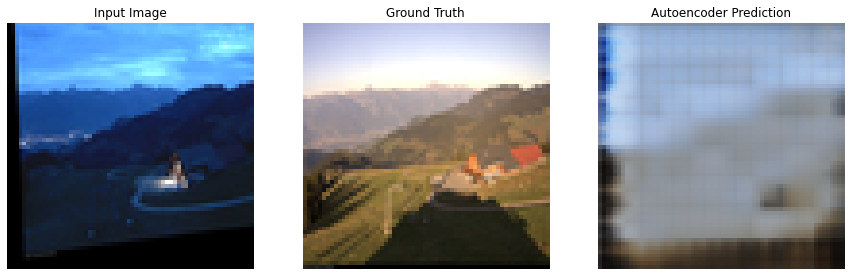

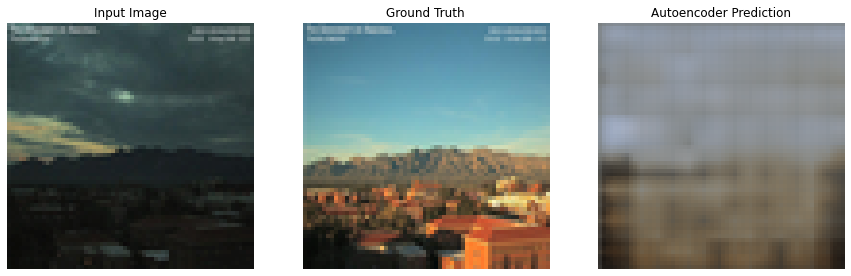

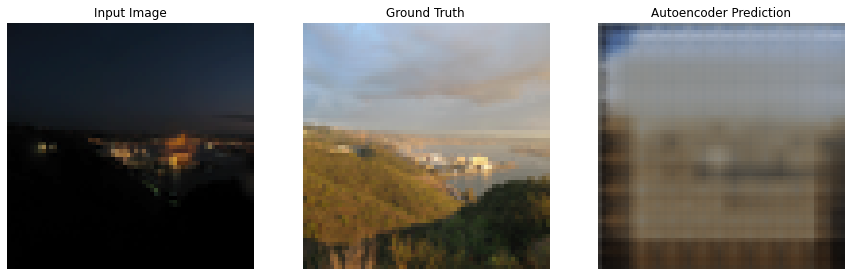

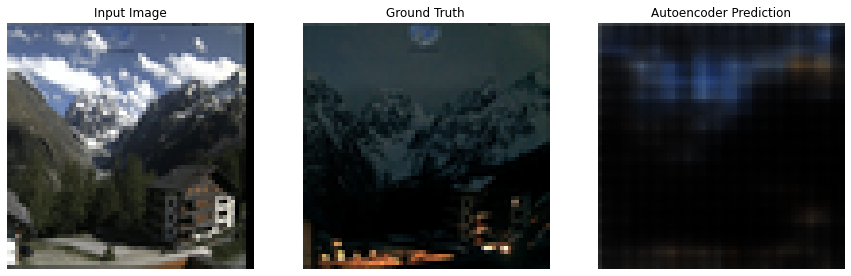

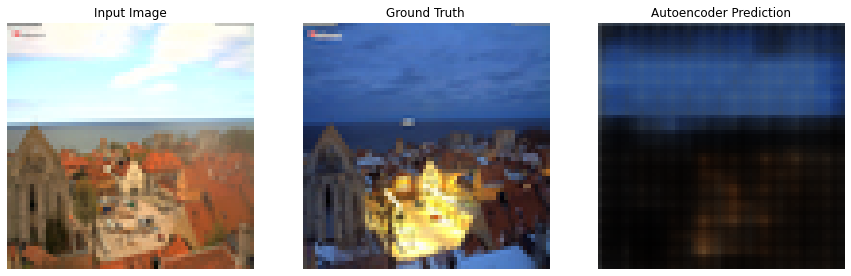

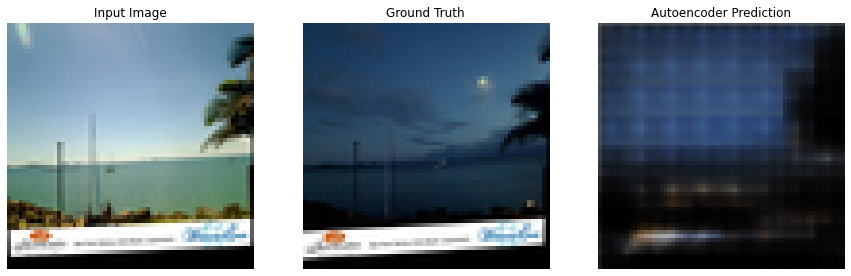

In [25]:
generate_images(tensor_test_data[22, :, :, :].numpy(), tensor_test_data[2, :, :, :].numpy(), test_day_decode_prediction[2, :, :, :].numpy())
generate_images(tensor_test_data[32, :, :, :].numpy(), tensor_test_data[12, :, :, :].numpy(), test_day_decode_prediction[12, :, :, :].numpy())
generate_images(tensor_test_data[28, :, :, :].numpy(), tensor_test_data[8, :, :, :].numpy(), test_day_decode_prediction[8, :, :, :].numpy())
generate_images(tensor_test_data[4, :, :, :].numpy(), tensor_test_data[24, :, :, :].numpy(), test_night_decode_prediction[4, :, :, :].numpy())
generate_images(tensor_test_data[17, :, :, :].numpy(), tensor_test_data[37, :, :, :].numpy(), test_night_decode_prediction[17, :, :, :].numpy())
generate_images(tensor_test_data[9, :, :, :].numpy(), tensor_test_data[29, :, :, :].numpy(), test_night_decode_prediction[9, :, :, :].numpy())

In [27]:
mae = tf.keras.losses.MeanAbsoluteError()

print('Day to Night mean absolute error:', mae(tensor_test_data[20:, :, :, :], test_night_decode_prediction).numpy())
print('Night to Day mean absolute error:', mae(tensor_test_data[:20, :, :, :], test_day_decode_prediction).numpy())

Day to Night mean absolute error: 0.35777128
Night to Day mean absolute error: 0.36602932
